In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

from PIL import Image

import glob
from scipy.misc import imread
from skimage.transform import resize
import pickle

In [3]:
with open ('../Data/neighbors.pkl', 'rb') as fp:
    itemlist = pickle.load(fp)
neighbors = [x[1] for x in itemlist]
neighbors = np.array(neighbors)
neighbors = neighbors[:, None]

In [4]:
with open ('../Data/distances.pkl', 'rb') as fp:
    itemlist = pickle.load(fp)
distances = [x[1] for x in itemlist]
distances = np.array(distances)
distances = distances[:, None]

In [5]:
images = glob.glob('../Imgs/Layers/*.png')
no_of_images = len(images)
w, h = 530, 637
dataset = np.zeros((no_of_images, w, h))
print(dataset.shape)
for idx, img_file in enumerate(images):
    img = imread(img_file, 'L')
    dataset[idx] = img

(162, 530, 637)


In [10]:
# d2 = dataset.reshape((len(images), -1))
reduced = TSNE(random_state=RS).fit_transform(np.hstack([neighbors, distances]))

In [7]:
reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))

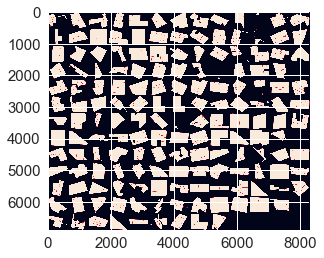

In [8]:
# draw all images in a merged image
image_width = w
image_height = h
merged_width = int(np.ceil(np.sqrt(no_of_images)) * image_width)
merged_height = int(np.ceil(np.sqrt(no_of_images)) * image_height)
merged_image = np.zeros((merged_width, merged_height), dtype='uint8')
ellipside=False
for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_height-image_height-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_height) + 1)
        if merged_image[a,b] != 0:
            continue
        img = dataset[index]
        merged_image[a:a+image_width, b:b+image_height] = img.astype(np.uint8)
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
        img = dataset[index]
        merged_image[a*image_width:(a+1)*image_width, b*image_height:(b+1)*image_height] = img
        
plt.imshow(merged_image)
plt.show()
merged_image = Image.fromarray(merged_image)
# if ellipside:
#     merged_image.save('merged-ellipsoide.png')
# else:
#     merged_image.save('merged-distances.png')


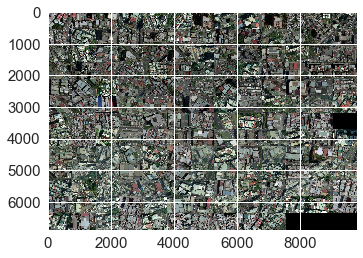

In [88]:
# draw all images in a merged image
image_width = w
image_height = h
merged_width = int(np.ceil(np.sqrt(no_of_images)) * image_width)
merged_height = int(np.ceil(np.sqrt(no_of_images)) * image_height)
merged_image = np.zeros((merged_width, merged_height, 3), dtype='uint8')
ellipside=False
for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_height-image_height-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_height) + 1)
        if merged_image[a,b, 0] != 0:
            continue
        img = dataset[index]
        merged_image[a:a+image_width, b:b+image_height,:] += img[:,:,:3].astype(np.uint8)
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
#         img = resize(dataset[index], (image_width, image_width))
        img = dataset[index]
        merged_image[a*image_width:(a+1)*image_width, b*image_height:(b+1)*image_height,:] = img[:,:,:3]

plt.imshow(merged_image)
plt.show()
merged_image = Image.fromarray(merged_image)
if ellipside:
    merged_image.save('merged-ellipsoide.png')
else:
    merged_image.save('merged.png')
